https://habr.com/ru/post/491552/



# Критерій Шовене

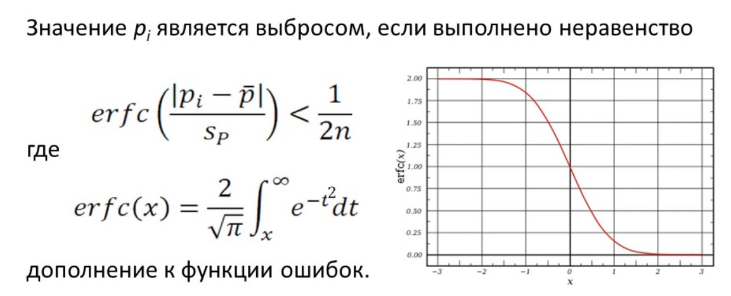

In [1]:
import math
import statistics as st

p_list = [8.02, 8.16, 3.97, 8.64, 0.84, 4.46, 0.81, 7.74, 8.78, 9.26, 20.46, 29.87, 10.38, 25.71]
p_list1 = [15, 16000, 20000, 22000, 24000, 15000, 18000]


def Chauvene(p_list):
    iteration_counter = 0

    while True and len(p_list) > 1:
        iteration_counter += 1
        stop_iter = True
        p_mean = st.mean(p_list)
        p_stdev = st.stdev(p_list)
        print("Iteration:", iteration_counter)
        for p in list(p_list):
            if p_stdev > 0 and math.erfc(math.fabs(p - p_mean) / p_stdev) < 1 / (2 * len(p_list)):
                print("Anomaly found:", p)
                p_list.remove(p)
                stop_iter = False
        if stop_iter:
            break

print(Chauvene(p_list))

Iteration: 1
Anomaly found: 29.87
Anomaly found: 25.71
Iteration: 2
Anomaly found: 20.46
Iteration: 3
Anomaly found: 0.84
Anomaly found: 0.81
Iteration: 4
Anomaly found: 3.97
Anomaly found: 4.46
Iteration: 5
Anomaly found: 10.38
Iteration: 6
Anomaly found: 7.74
Anomaly found: 9.26
Iteration: 7
None


In [2]:
import numpy as np

#Функция, показывающая выбросы или возвращающая выборку без выбросов.
#Основана на подходе квартилей
def find_outlers_quantile(data, only_outliers=False):
    data = np.array(data)
    q_25 = np.quantile(data, 0.25)
    q_75 = np.quantile(data, 0.75)
    x_min = q_25 - (q_75 - q_25) * 1.5
    x_max = q_75 + (q_75 - q_25) * 1.5
    if only_outliers:
        return data[(data <= x_min) | (data >= x_max)]
    return data[(data > x_min) & (data < x_max)]
    
#Пример использования
find_outlers_quantile([1, 2 ,3, 3.3, 56, 2, -3, -4, 7, 5, 8, 22])


array([ 1. ,  2. ,  3. ,  3.3,  2. , -3. , -4. ,  7. ,  5. ,  8. ])

In [3]:
find_outlers_quantile([1, 2 ,3, 3.3, 56, 2, -3, -4, 7, 5, 8, 22], only_outliers=True)

array([56., 22.])

In [4]:
find_outlers_quantile(p_list1)

array([16000, 20000, 22000, 24000, 15000, 18000])

Перша і третя квартиль мають значення визнання Р рівні 2, 4 відповідно. Які з наступних значень будуть вважатися викидами?

In [5]:
q25 = 2
q75 = 4
P = [8, 0.5, 7.5, 6.5, 0, 3, -1.5]
for x in P:
    if x < q25 - 1.5*(q75 - q25) or x > q75 + 1.5*(q75 - q25):
        print(x)

8
7.5
-1.5


Середнє значення, відхилення і медіана десяти значень змінної $Р$ рівні 10, 1.1 (одна ціла одна десята) і 9 відповідно. Які із наступних значень будуть викидами? Не забудьте в процесі рішення перевірити симметричность вибору.

In [6]:
# https://stepik.org/lesson/83242/step/2?thread=solutions&unit=59877
x, sd, m, n = 10, 1.1, 9, 10
to_check = [13.5, 6.5, 13, 14, 7, 6]

def check_simm(mean, median, sd, n):
    """Проверка выборки на симметричность"""
    left = abs(median - mean)
    right = 3 * ((sd ** 2 / n)) ** 0.5
    return left <= right

def find_outliers(data, mean, median, sd, n):
    """Проверка выборки на выбросы"""
    outliers = []
    if check_simm(mean, median, sd, n):
        diap = [mean - 3 * sd, mean + 3 * sd]
    else:
        diap = [mean - 5 * sd, mean + 5 * sd]
    for value in data:
        if diap[0] < value < diap[1]:
            continue
        else:
            outliers.append(value)
    return outliers

find_outliers(to_check, x, m, sd, n)

[13.5, 6.5, 14, 6]

Уявіть, що у вас є вибір із значенням змінної Р, а середнє значення в ньому дорівнює 50. Для цього вибору був застосований критерій Шовене пошуку викидів. Виявилось, що елементи вибірки рівні 42 і 57 були визнані викидами. Які із зазначених нижче чисел критеріїв Шовене гарантовано визначено як викиди? P=[41,44,56,58]

41 та 58